In [1]:
import pandas as pd
import numpy as np

In [2]:
# This will allow you to see all column names & rows when you are doing .head(). None of the column name will be truncated.
# source: https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
# source: https://gist.github.com/rozanecm/38f2901c592bdffc40726cb0473318cf
# Function which plays a beep of given duration and frequency.
# Useful for when executing things that need a while to finish, to get notified.
import os
def beep(duration = 1, freq = 1500):
    """ play tone of duration in seconds and freq in Hz. """
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [4]:
train = pd.read_csv('../data/train.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha']
#                     , nrows=1000
                   )
test = pd.read_csv('../data/test.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha']
#                    , nrows=100
                  )

In [5]:
rescued_coords = pd.read_csv('../data/rescueLatLongs.csv')
precios_en_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [6]:
# mergeamos con coords. extra obtenidas en tp1.
train = train.merge(rescued_coords.drop('Unnamed: 0', axis=1), how='left', on='id')
train['lat_x'] = train.apply(lambda x: x['lat_y'] if pd.isna(x['lat_x']) else x['lat_x'], axis=1)
train['lng_x'] = train.apply(lambda x: x['lng_y'] if pd.isna(x['lng_x']) else x['lng_x'], axis=1)
train.drop(['lat_y','lng_y'], axis=1, inplace=True)
train.rename(columns={'lat_x':'lat','lng_x':'lon'}, inplace=True)

# por consistencia, para que ambos datasets tengan mismos nombres
test.rename(columns={'lng':'lon'}, inplace=True)
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lon,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23536.0,31.733330,-106.48333,2015-08-23,False,False,False,False,False,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24512.0,19.312500,-99.25000,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48544.0,NaN,NaN,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53664.0,19.296875,-99.68750,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47840.0,20.723560,-103.38479,2016-06-07,False,False,False,False,False,1150000.0


In [7]:
# inf. values don't make sense. I think it's preferable to treat them as nans directly.
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Agregamos features que ya hemos creado para analisis de tp1

In [8]:
def contar_amenities(row):
    return row['gimnasio'] + row['usosmultiples'] + row['piscina'] + row['escuelascercanas'] + row['centroscomercialescercanos']

In [9]:
train['cant_amenities'] = train.apply(lambda x: contar_amenities(x), axis=1)
test['cant_amenities'] = test.apply(lambda x: contar_amenities(x), axis=1)

In [10]:
palabras_avenida = ['avenida', 'av']
train['es_avenida'] = train['direccion'].fillna('no info').apply(lambda x: any(avenida_indicator in x.lower() for avenida_indicator in palabras_avenida))
test['es_avenida'] = test['direccion'].fillna('no info').apply(lambda x: any(avenida_indicator in x.lower() for avenida_indicator in palabras_avenida))

In [11]:
def feature_fechas(df, with_sin_cos=True):
    # Para entender lo de los senos y cosenos: https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
    df['year'] = df['fecha'].dt.year
    df['month'] = df['fecha'].dt.month
    df['day'] = df['fecha'].dt.day
    if with_sin_cos:
        df['sin_month'] = np.sin(2*np.pi*df['month']/12)
        df['cos_month'] = np.cos(2*np.pi*df['month']/12)
        # tomo cant. de dias en mes: 31 en todos los casos. Para esto deberia servir bastante bien igual.
        df['sin_day'] = np.sin(2*np.pi*df['day']/31)
        df['cos_day'] = np.cos(2*np.pi*df['day']/31)

        # no necesito mas las cols. originales de month y day.
        df.drop(['month','day'], axis=1, inplace=True)
    
feature_fechas(train)
feature_fechas(test)

# * Fin agregado de features de tp1 *

El sample submission no tiene header. **Ojo con eso al guardar la submission.** Hagamos la funcion para guardar submissions ahora, para evitar problemas a futuro y despreocuparnos.

In [12]:
# To save predictions.
# There must be a directory ../predictions for this to work as expected.
# source: https://gist.github.com/rozanecm/ee8333741db42b10158b3e0aff3f22aa
import time
def _get_filename(my_name, timestamp):
    return "../predictions/" + timestamp + " by " + my_name + ".csv"

def _save_description(authors_name, timestamp, submission_description):
    f = open("../predictions/" + authors_name + ".txt","a")
    f.write(timestamp + ": " + submission_description + '\n')
    f.close()

def save_submission(submission_df, authors_name="rozanecm", description = "no description.", index=False, header=True):
    timestamp = time.strftime("%Y.%m.%d - %H:%M:%S")
    submission_df.to_csv(_get_filename(authors_name, timestamp), index=index, header=header)
    _save_description(authors_name, timestamp, description)

In [13]:
# Define a seed, so all algorithms that accept a seed, take the same, for consistency reasons,
# so everything can be replicated without problems random state
seed=42

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('precio', axis=1), train['precio'], test_size=0.33, random_state=seed)

In [15]:
beep()

# Clustering
## Data transformation

In [17]:
# source: https://gist.github.com/rozanecm/ee8333741db42b10158b3e0aff3f22aa
small_size_cat_columns = ['tipodepropiedad','provincia']
large_size_cat_columns = ['ciudad']

num_columns = [
#     'id',
    "antiguedad","habitaciones",'garages',
    'banos','metroscubiertos', 'metrostotales','idzona',
    'lat', 'lon', 'cant_amenities',
    'year','sin_month','cos_month', 'sin_day', 'cos_day']

bool_columns = ['gimnasio','usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','es_avenida']

text_columns = ['titulo'
                ,'descripcion'
                ,'direccion'
               ]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import mean_absolute_error

transformers = []

transformers.append(("small_cat",
                     Pipeline(steps=[
                         ("category_imputer", SimpleImputer(strategy='constant', fill_value="")),
                         ("one_hot", OneHotEncoder(handle_unknown='ignore')),
                         ("svd", TruncatedSVD(n_components=11, n_iter=7, random_state=seed))
                     ]),
                     small_size_cat_columns))

transformers.append(("large_cat",
                     Pipeline(steps=[
                         ("category_imputer", SimpleImputer(strategy='constant', fill_value="")),
                         ("one_hot", OneHotEncoder(handle_unknown='ignore')),
                         ("svd", TruncatedSVD(n_components=25, n_iter=7, random_state=seed))
                     ]),
                     large_size_cat_columns))

transformers.append(("num",
                     Pipeline(steps=[
                         ("num_imputer", SimpleImputer(strategy='most_frequent',verbose=1)),
                         ("num_transformer", StandardScaler())
                     ]),
                   num_columns))

transformers.append(("bool",
                    Pipeline(steps=[
                        ("bool_imputer", SimpleImputer(strategy='most_frequent')),
                    ]),
                     bool_columns))

# The reason this for is necessary is because text transformers take an array-like parameter.
# If we pass a list of columns, then the transformer will receive a dataframe, and that will result in error.
# If you don't want to process all the text columns with the same pipeline, you'll have to define
# a different pipelines for each, and pass a different list for each of the pipelines.
# for col in text_columns_titulo:
for col in text_columns:
    # First, fill empty texts with an empty string.
    X_train[col] = X_train[col].fillna("")
    X_test[col] = X_test[col].fillna("")
    train[col] = train[col].fillna("")
    test[col] = test[col].fillna("")
    transformer_name = "text_" + col
    transformers.append((transformer_name,
                        Pipeline(steps=[
#                             ("text_imputer", SimpleImputer(strategy='constant', fill_value="")),
                            ("hashing_vectorizer", HashingVectorizer(decode_error='replace', strip_accents='ascii', 
#                                                                      ngram_range=(2,5)
                                                                    )),
                            ("svd", TruncatedSVD(n_components=20, n_iter=7, random_state=seed))
    #                         se podria agregar una svd.... o alguna proyeccion... 
                        ]),
                         col))

my_col_transformer = ColumnTransformer(transformers, remainder='drop', sparse_threshold=0.3, 
                                       n_jobs=-1, 
                                       transformer_weights=None)

steps = []

steps.append(("col_trans", my_col_transformer))

my_pipe = Pipeline(steps, verbose=True)

In [19]:
train_transformed = my_pipe.fit_transform(train.drop(['precio'],axis=1).replace({True:1,False:0}))
test_transformed = my_pipe.transform(test.replace({True:1,False:0}))

[Pipeline] ......... (step 1 of 1) Processing col_trans, total= 1.9min


### Reduccion de dimensiones
#### Train

In [36]:
from sklearn.decomposition import PCA

num_dimens = 117

pca_result = PCA(n_components=num_dimens, random_state=seed).fit(train_transformed)

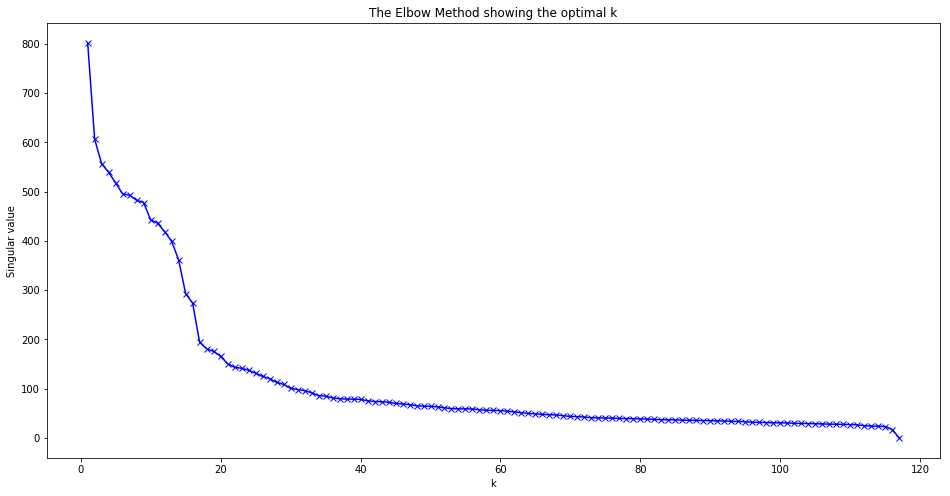

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(range(1,num_dimens+1), pca_result.singular_values_, 'bx-')
plt.xlabel('k')
plt.ylabel('Singular value')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
from sklearn.decomposition import PCA

num_dimens = 25

pca_result = PCA(n_components=num_dimens, random_state=seed).fit(train_transformed)

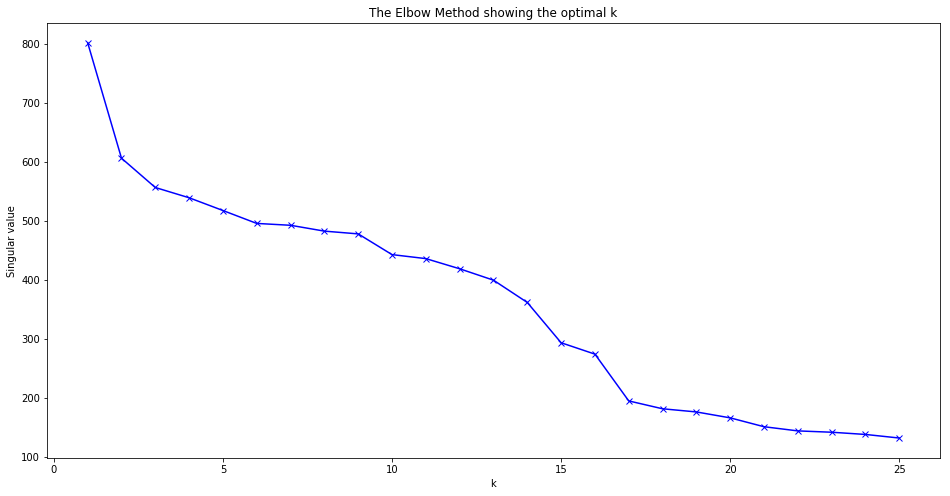

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(range(1,num_dimens+1), pca_result.singular_values_, 'bx-')
plt.xlabel('k')
plt.ylabel('Singular value')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Se decide tomar 17 dimensiones.

#### Test

In [43]:
from sklearn.decomposition import PCA

num_dimens = 117

pca_result = PCA(n_components=num_dimens, random_state=seed).fit(test_transformed)

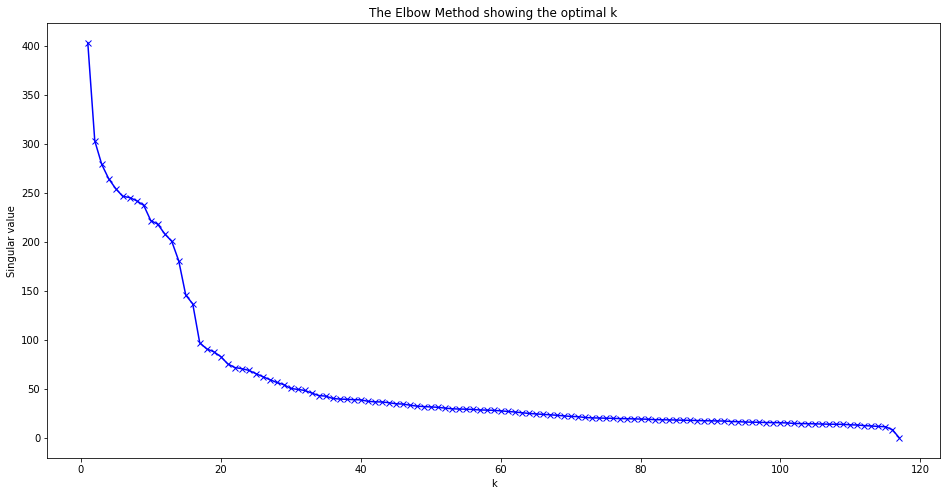

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(range(1,num_dimens+1), pca_result.singular_values_, 'bx-')
plt.xlabel('k')
plt.ylabel('Singular value')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Se observa el mismo comportamiento en ambos casos.

In [40]:
from sklearn.decomposition import PCA

num_dimens = 17

train_transformed_reduced = PCA(n_components=num_dimens, random_state=seed).fit_transform(train_transformed)
test_transformed_reduced = PCA(n_components=num_dimens, random_state=seed).fit_transform(test_transformed)

In [49]:
from sklearn.manifold import TSNE

num_dimens = 17

train_transformed_reduced_tsne = TSNE(n_components=num_dimens, random_state=seed).fit_transform(train_transformed)
test_transformed_reduced_tsne = TSNE(n_components=num_dimens, random_state=seed).fit_transform(test_transformed)

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

## DBSCAN? Let's go the OPTICS way better!

In [50]:
from sklearn.cluster import OPTICS

In [51]:
clustering_optics = OPTICS(n_jobs=-1)
clustering_optics.fit(np.append(train_transformed_reduced, test_transformed_reduced, axis=0))

KeyboardInterrupt: 

In [ ]:
clustering_optics.labels_[:1000]

In [ ]:
beep()

## Dendrogram

In [79]:
from scipy.cluster import hierarchy
from scipy.spatial import distance
import matplotlib.pyplot as plt

p = 0.5
Z = distance.pdist(train_transformed, p=p, metric='minkowski')
Z = hierarchy.linkage(Z, 'single')

In [80]:
Z

array([[ 154.        ,  360.        ,   74.70677683,    2.        ],
       [  49.        ,  834.        ,   84.77076369,    2.        ],
       [ 231.        ,  355.        ,   99.14284993,    2.        ],
       ...,
       [ 397.        , 1995.        ,  965.54168321,  998.        ],
       [ 209.        , 1996.        ,  991.03841292,  999.        ],
       [ 783.        , 1997.        , 1003.5296804 , 1000.        ]])

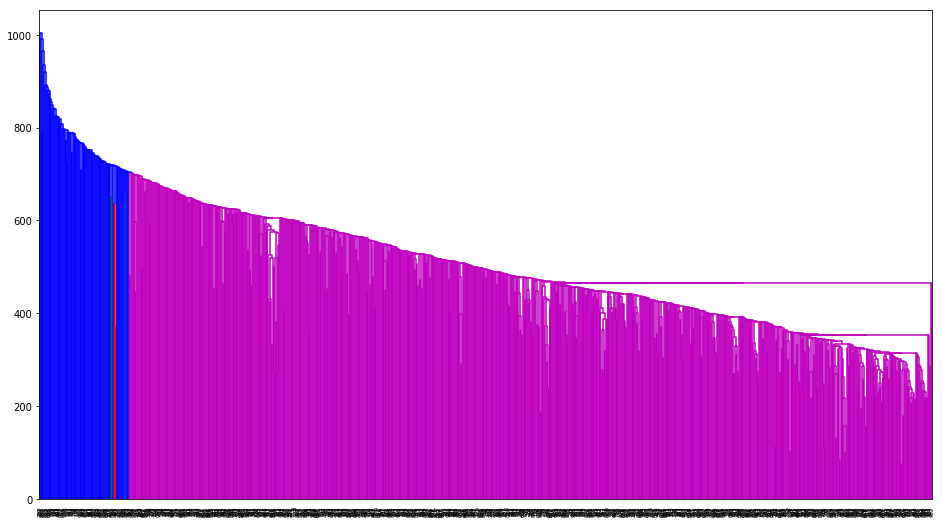

In [81]:
plt.figure(figsize=(16,9))
dn = hierarchy.dendrogram(Z)

In [56]:
beep()

No hay caso, demasiados datos para el dendrograma.

## KMeans

In [87]:
# source: https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [90]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(init='k-means++', n_clusters=k, random_state=seed, n_jobs=-1, verbose=3)
    kmeanModel.fit(train_transformed)
    distortions.append(kmeanModel.inertia_)

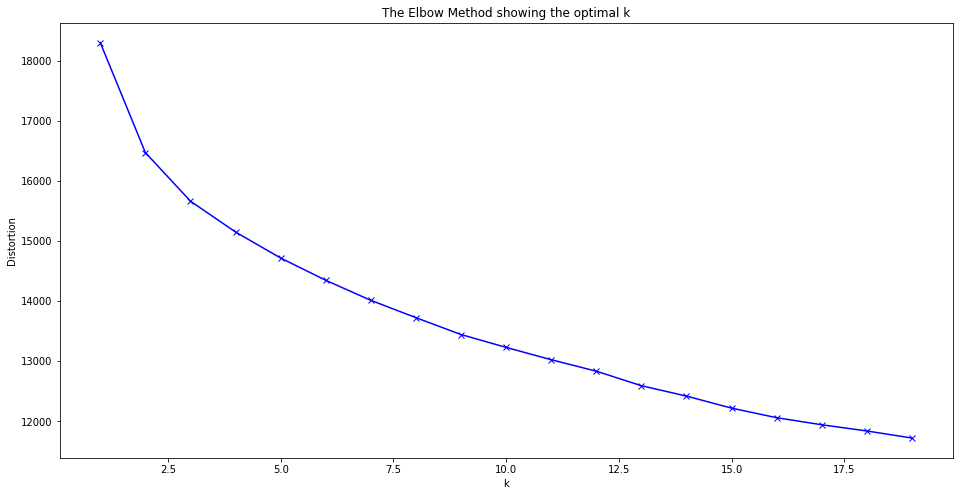

In [91]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [93]:
from sklearn.cluster import KMeans
distortions = []
K = range(21,40)
for k in K:
    kmeanModel = KMeans(init='k-means++', n_clusters=k, random_state=seed, n_jobs=-1, verbose=3)
    kmeanModel.fit(train_transformed)
    distortions.append(kmeanModel.inertia_)

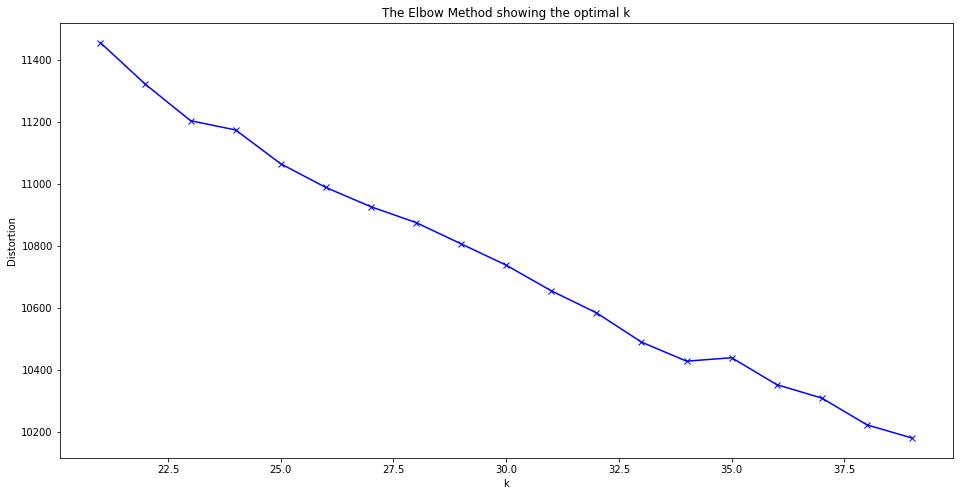

In [94]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [92]:
beep()